# Tinyml-on-the-edge
## Gesture recognition

## Setup Python Environment 

Set up notebook depencencies. Very vital

In [ ]:
# Setup environment
!apt-get -qq install xxd
!pip install pandas numpy matplotlib
!pip install tensorflow==2.0.0-rc1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow==2.0.0-rc1 (from versions: 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0)
ERROR: No matching distribution found for tensorflow==2.0.0-rc1


# Upload Data

1. Open the panel on the left side of Colab by clicking on the __>__
1. Select the files tab
1. Drag `punch.csv` and `flex.csv` files from your computer to the tab to upload them into colab.

# Graph and inspect nature of data

Graph the input files on two separate graphs, acceleration and gyroscope, as each data set has different units and scale.

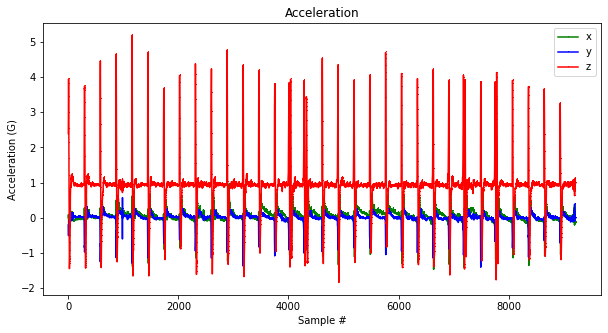

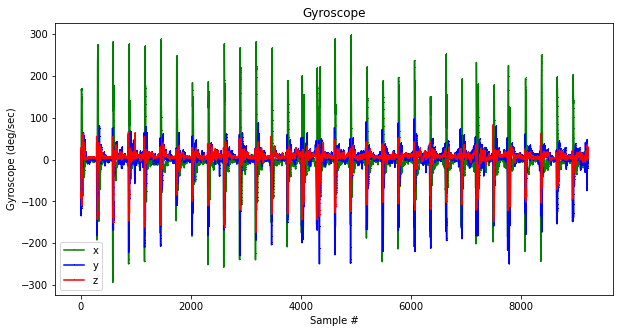

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
filename = "up.csv"

df = pd.read_csv('/content/sample_data/' + filename) 


index = range(1, len(df['aX']) + 1)

plt.rcParams["figure.figsize"] = (10,5)

plt.plot(index, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['aY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['aZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Acceleration")
plt.xlabel("Sample #")
plt.ylabel("Acceleration (G)")
plt.legend()
plt.show()

plt.plot(index, df['gX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['gY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['gZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Gyroscope")
plt.xlabel("Sample #")
plt.ylabel("Gyroscope (deg/sec)")
plt.legend()
plt.show()



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import librosa 
import math

List_Index = [ 'aX', 'aY', 'aZ', 'gX', 'gY', 'gZ']

# Set a fixed random seed value, for reproducibility, this will allow us to get
# the same random numbers each time the notebook is run
# "Reproducibility" means the ability to run the same thing twice and get 
#the same results.

SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

# the list of gestures that data is available for
GESTURES = [
    "up", 
    "right",   
]

SAMPLES_PER_GESTURE = 288

NUM_GESTURES = len(GESTURES)

# create a one-hot encoded matrix that is used in the output
ONE_HOT_ENCODED_GESTURES = np.eye(NUM_GESTURES)

inputs = []
outputs = []
window = np.hanning(64)


# read each csv file and push an input and output
for gesture_index in range(NUM_GESTURES):
  starting_sample = 0 
  End_sample = 288
  gesture = GESTURES[gesture_index]
  print(f"Processing index {gesture_index} for gesture '{gesture}'.")
  
  output = ONE_HOT_ENCODED_GESTURES[gesture_index]
  
  df = pd.read_csv("/content/sample_data/" + gesture + ".csv")
  
  # calculate the number of gesture recordings in the file
  num_recordings = int(df.shape[0] / SAMPLES_PER_GESTURE)
  
  print(f"\tThere are {num_recordings} recordings of the {gesture} gesture.")
  
  for i in range(num_recordings): # num_recordings
    Wave = df.iloc[starting_sample:End_sample,:]  
    tensor = []
    for j in List_Index:
      starting_sample_Colone = 0 
      End_sample_Colone = 64
      WaveColone = Wave[j] 
      
       
      for f in range(8): 
        
        WaveColone_reduced = WaveColone[starting_sample_Colone:End_sample_Colone]  
       
        starting_sample_Colone = starting_sample_Colone + 32
        End_sample_Colone = End_sample_Colone + 32

        SmallWave = WaveColone_reduced.copy().to_numpy()      
       
        for e in range(64):
          SmallWave[e] = SmallWave[e] * 2
           
        SmallWave_FFT = []
        SmallWave_FFT = abs(np.fft.fft(SmallWave))

        for e in range(32):
          tensor += [SmallWave_FFT[e],]
          
    inputs.append(tensor)    
    outputs.append(output)
    starting_sample = starting_sample + 288
    End_sample = End_sample + 288
        
inputs = np.array(inputs)
outputs = np.array(outputs)
print( inputs.shape )
print( outputs.shape )   

print("Data set parsing and preparation complete.")

TensorFlow version = 2.9.2

Processing index 0 for gesture 'up'.
	There are 32 recordings of the up gesture.
Processing index 1 for gesture 'right'.
	There are 37 recordings of the right gesture.
(69, 1536)
(69, 2)
Data set parsing and preparation complete.


In [ ]:
num_inputs = len(inputs)
randomize = np.arange(num_inputs)
np.random.shuffle(randomize)

# Swap the consecutive indexes (0, 1, 2, etc) with the randomized indexes
inputs = inputs[randomize]
outputs = outputs[randomize]

# Split the recordings (group of samples) into three sets: training, testing and validation
TRAIN_SPLIT = int(0.6 * num_inputs)
TEST_SPLIT = int(0.2 * num_inputs + TRAIN_SPLIT)

inputs_train, inputs_test, inputs_validate = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
outputs_train, outputs_test, outputs_validate = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])

print("Data set randomization and splitting complete.")

Data set randomization and splitting complete.


In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation='relu')) # relu is used for performance
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(NUM_GESTURES, activation='softmax')) # softmax is used, because we only expect one gesture to occur per input
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(inputs_train, outputs_train, epochs=600, batch_size=1, validation_data=(inputs_validate, outputs_validate))

Epoch 1/600
41/41 [==============================] - 1s 8ms/step - loss: 0.4878 - mae: 0.4878 - val_loss: 0.6000 - val_mae: 0.6000
Epoch 2/600
41/41 [==============================] - 0s 5ms/step - loss: 0.4146 - mae: 0.4146 - val_loss: 0.6000 - val_mae: 0.6000
Epoch 3/600
41/41 [==============================] - 0s 5ms/step - loss: 0.4390 - mae: 0.4390 - val_loss: 0.6000 - val_mae: 0.6000
Epoch 4/600
41/41 [==============================] - 0s 4ms/step - loss: 0.3659 - mae: 0.3659 - val_loss: 0.6000 - val_mae: 0.6000
Epoch 5/600
41/41 [==============================] - 0s 4ms/step - loss: 0.3902 - mae: 0.3902 - val_loss: 0.6000 - val_mae: 0.6000
Epoch 6/600
41/41 [==============================] - 0s 3ms/step - loss: 0.3902 - mae: 0.3902 - val_loss: 0.6000 - val_mae: 0.6000
Epoch 7/600
41/41 [==============================] - 0s 4ms/step - loss: 0.3902 - mae: 0.3902 - val_loss: 0.6000 - val_mae: 0.6000
Epoch 8/600
41/41 [==============================] - 0s 4ms/step - loss: 0.3902 - m

(13, 1536)
1/1 [==============================] - 0s 193ms/step
predictions =
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]
actual =
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


<ipython-input-6-dded38e7d75b>:12: MatplotlibDeprecationWarning: cycling among columns of inputs with non-matching shapes is deprecated.
  plt.plot(inputs_test, outputs_test, 'b.', label='Actual')
<ipython-input-6-dded38e7d75b>:13: MatplotlibDeprecationWarning: cycling among columns of inputs with non-matching shapes is deprecated.
  plt.plot(inputs_test, predictions, 'r.', label='Predicted')


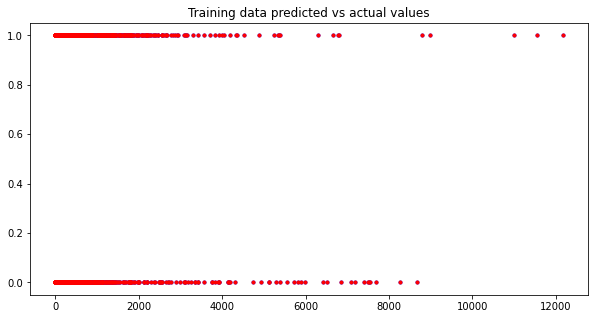

In [ ]:
print(inputs_test.shape)
# use the model to predict the test inputs
predictions = model.predict(inputs_test)

# print the predictions and the expected ouputs
print("predictions =\n", np.round(predictions, decimals=3))
print("actual =\n", outputs_test)

# Plot the predictions along with to the test data
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(inputs_test, outputs_test, 'b.', label='Actual')
plt.plot(inputs_test, predictions, 'r.', label='Predicted')
plt.show()

In [ ]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open("gesture_model.tflite", "wb").write(tflite_model)
  
import os
basic_model_size = os.path.getsize("gesture_model.tflite")
print("Model is %d bytes" % basic_model_size)

Model is 320044 bytes


In [ ]:
!echo "const unsigned char model[] = {" > /content/model.h
!cat gesture_model.tflite | xxd -i      >> /content/model.h
!echo "};"                              >> /content/model.h

import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")
print("\nOpen the side panel (refresh if needed). Double click model.h to download the file.")

Header file, model.h, is 1,973,640 bytes.

Open the side panel (refresh if needed). Double click model.h to download the file.
